In [1]:
from __future__ import absolute_import ,division,print_function
import os
import numpy as np 
import pandas as pd 
import tensorflow as tf

from tensorflow import keras
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
tf.__version__
from sklearn.metrics import confusion_matrix


Using TensorFlow backend.


In [2]:
class Net(tf.keras.Model):
  """A simple linear model."""

  def __init__(self):
    super(Net, self).__init__()
    self.l1 = tf.keras.layers.Dense(5)

  def call(self, x):
    return self.l1(x)

In [3]:
net = Net()

In [4]:
net.save_weights('easy_checkpoint')

In [5]:
data = pd.read_csv("/home/roopesh/PythonFiles/colorectal-histology-mnist/hmnist_64_64_L.csv")    

In [6]:
data.head() 

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,134,99,119,130,142,169,152,139,117,87,...,112,89,73,100,120,120,126,140,195,2
1,55,64,74,63,74,75,71,73,70,77,...,79,85,86,77,68,66,65,68,69,2
2,114,116,136,152,132,100,151,150,127,205,...,128,157,159,205,182,143,129,89,122,2
3,86,82,88,85,103,93,98,109,104,115,...,79,80,109,128,89,85,80,63,48,2
4,168,143,140,139,129,123,123,141,137,101,...,231,199,183,195,179,134,142,158,149,2


In [7]:
Y = data["label"]
data.drop(["label"],axis=1, inplace=True)
X = data

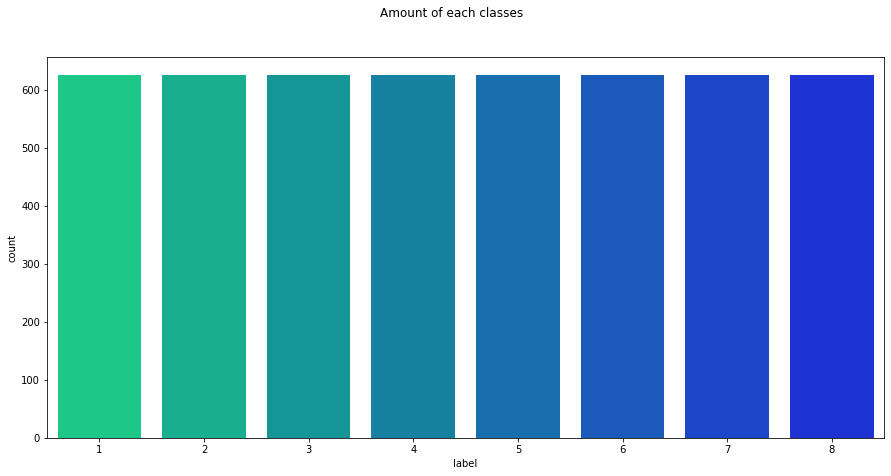

In [8]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y, palette="winter_r")
plt.suptitle("Amount of each classes")
plt.show()

In [9]:
Y.value_counts()     

7    625
3    625
6    625
2    625
5    625
1    625
8    625
4    625
Name: label, dtype: int64

In [10]:
X = X / 255.0 

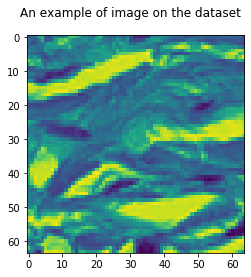

In [11]:
img = X.iloc[75].to_numpy()
img = img.reshape(64,64)
plt.imshow(img)
plt.suptitle("An example of image on the dataset")
plt.show()

In [12]:
X = X.values.reshape(-1,64,64,1)       # shaping for the Keras
Y = Y.values

In [13]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding for better results
Y = to_categorical(Y)

In [14]:
# Splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [15]:
print("x_train.shape: ",x_train.shape)
print("x_val.shape: ",x_val.shape)
print("y_train.shape: ",y_train.shape)
print("y_val.shape: ",y_val.shape)

x_train.shape:  (4000, 64, 64, 1)
x_val.shape:  (1000, 64, 64, 1)
y_train.shape:  (4000, 9)
y_val.shape:  (1000, 9)


In [16]:
def create_model():
    model = Sequential()

    model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (64,64,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256,activation = "relu"))          
    model.add(Dense(64,activation = "relu"))
    model.add(Dense(32,activation = "relu"))

    model.add(Dense(9, activation = "softmax"))
    model.compile(optimizer = "Adam" , loss = "categorical_crossentropy", metrics=["accuracy"])
    return model
model=create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 128)       3328      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [18]:
checkpoint_path="/home/roopesh/PythonFiles/taininig_dl/cp-{epoch:04d}.ckpt"#"taininig_dl/cp-{epoch:04d}.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)
cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,verbose=1,save_weights_only=True,save_freq=2)#to create checkpoints after every 5 epoch .period=5
model =create_model()
datagen = ImageDataGenerator(
        rotation_range=0.5, 
        zoom_range = 0.5, 
        width_shift_range=0.5,  
        height_shift_range=0.5, 
        horizontal_flip=True, 
        vertical_flip=True)

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train,y_train, batch_size=200),
                              epochs = 21, validation_data = (x_val,y_val), steps_per_epoch=200)

Epoch 1/21
200/200 [==============================] - 1230s 6s/step - loss: 1.3107 - accuracy: 0.4347 - val_loss: 1.0814 - val_accuracy: 0.5460
Epoch 2/21
200/200 [==============================] - 1249s 6s/step - loss: 0.9630 - accuracy: 0.6072 - val_loss: 1.0180 - val_accuracy: 0.6220
Epoch 3/21
200/200 [==============================] - 1235s 6s/step - loss: 0.8869 - accuracy: 0.6446 - val_loss: 0.7681 - val_accuracy: 0.7140
Epoch 4/21
200/200 [==============================] - 1225s 6s/step - loss: 0.8575 - accuracy: 0.6626 - val_loss: 0.9691 - val_accuracy: 0.6500
Epoch 5/21
200/200 [==============================] - 1236s 6s/step - loss: 0.8176 - accuracy: 0.6790 - val_loss: 0.9844 - val_accuracy: 0.6260
Epoch 6/21
200/200 [==============================] - 1238s 6s/step - loss: 0.8193 - accuracy: 0.6709 - val_loss: 0.8332 - val_accuracy: 0.6840
Epoch 7/21
200/200 [==============================] - 1273s 6s/step - loss: 0.7873 - accuracy: 0.6932 - val_loss: 1.1086 - val_accuracy:

In [21]:
checkpoint_path="/home/roopesh/PythonFiles/"
checkpoint_dir=os.path.dirname(checkpoint_path)
!ls {checkpoint_dir}
#latest=tf.train.latest_checkpoint(checkpoint_dir)

checkpoint		    DeepLearning_old.ipynb		 taining_dl
colorectal-histology-mnist  easy_checkpoint.data-00000-of-00001
DeepLearning.ipynb	    easy_checkpoint.index


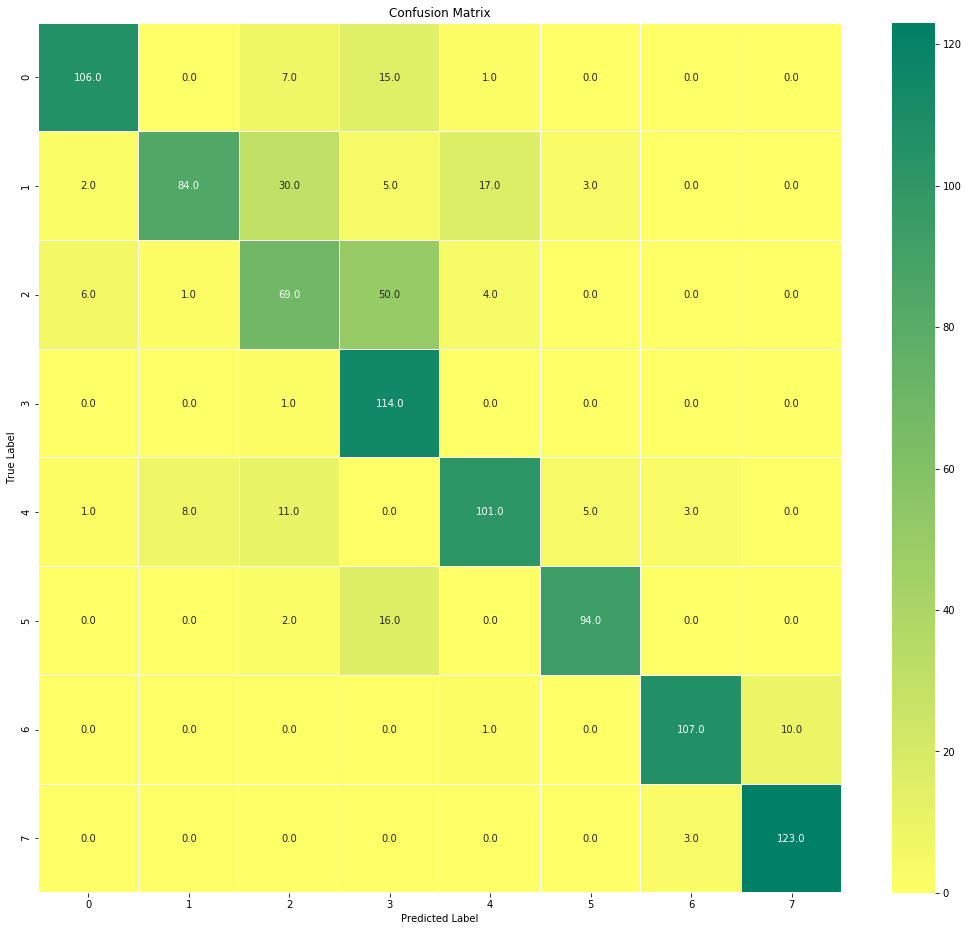

In [22]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="summer_r", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
model.save('dl_acc_80.h5')

In [25]:
model=create_model()
loss,acc=model.evaluate(x_val,y_val)
print("Untrained accuracy is :{:5.2f}%".format(100*acc))

1000/1000 [==============================] - 14s 14ms/step
Untrained accuracy is :15.00%


In [30]:
checkpoint_path="/home/roopesh/PythonFiles/"
checkpoint_dir=os.path.dirname(checkpoint_path)
latest=tf.train.latest_checkpoint(checkpoint_dir)
latest

'/home/roopesh/PythonFiles/easy_checkpoint'

In [32]:
new_model=keras.models.load_model('dl_acc_80.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 128)       3328      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

In [33]:
#checkpoint_path="/home/roopesh/PythonFiles/"
#model.load_weights(latest)
loss,acc=new_model.evaluate(x_val,y_val)
print("Trained accuracy is :{:5.2f}%".format(100*acc))

1000/1000 [==============================] - 13s 13ms/sample - loss: 0.5503 - accuracy: 0.7980
Trained accuracy is :79.80%


In [ ]:
model.save('dl_acc_80.h5')

In [ ]:
#model.save_weights(./checkpoints/my_checkpoints)#save the weights
#model=create_model()
#model.load_weights('./checkpoints/my_checkpoints')
#loss,acc=model.evaluate()
#Save the entire model
#model =create_model()
#model.fit_generator(datagen.flow(x_train,y_train, batch_size=200),epochs = 20, validation_data = (x_val,y_val), steps_per_epoch=500)
#model.save('my_model.h5')
#

In [ ]:
#datagen = ImageDataGenerator(
 #       rotation_range=0.5, 
  #      zoom_range = 0.5, 
   #     width_shift_range=0.5,  
    #    height_shift_range=0.5, 
     #   horizontal_flip=True, 
      #  vertical_flip=True)

#datagen.fit(x_train)